# Exploratory Data Analysis of AI Models Dataset

In [1]:
import warnings
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

# Set display format to show floating point numbers without scientific notation
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# Suppress warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../../data/models_info.csv")
print("Dataset Information:")
data.info(verbose=True)
print("\nBasic Statistics:")
print(data.describe())
data.head()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model_name       20000 non-null  object 
 1   model_size       7382 non-null   float64
 2   downloads        20000 non-null  int64  
 3   likes            20000 non-null  int64  
 4   task_category    13341 non-null  object 
 5   model_category   13332 non-null  object 
 6   creators         20000 non-null  object 
 7   publishing_date  20000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB

Basic Statistics:
            model_size    downloads    likes
count          7382.00     20000.00 20000.00
mean    12820835848.15     86280.77    45.34
std     45359733986.40   1728136.79   230.22
min               0.00         0.00     1.00
25%       320806716.00        26.00     2.00
50%      3606420699.00       173.00     5.00
75%      829137

,model_name,model_size,downloads,likes,task_category,model_category,creators,publishing_date
0,Qwen/QwQ-32B,32763876352.00,169234,1929,text-generation,Natural Language Processing,Qwen,2025-03-05T14:16:59.000Z
1,deepseek-ai/DeepSeek-R1,684531386000.00,3210708,11150,text-generation,Natural Language Processing,deepseek-ai,2025-01-20T03:46:07.000Z
2,microsoft/Phi-4-multimodal-instruct,5574460384.00,366193,1082,automatic-speech-recognition,Audio,microsoft,2025-02-24T22:33:32.000Z
3,CohereForAI/aya-vision-8b,8631842032.00,144974,239,image-text-to-text,Multimodal,CohereForAI,2025-03-02T18:06:46.000Z
4,SparkAudio/Spark-TTS-0.5B,NaN,5614,245,text-to-speech,Audio,SparkAudio,2025-02-27T05:01:46.000Z


#### Let's check for missing values (NaNs) in our dataset

In [3]:
data.isnull().sum()

model_name             0
model_size         12618
downloads              0
likes                  0
task_category       6659
model_category      6668
creators               0
publishing_date        0
dtype: int64

#### Let's analyze the distribution of AI models by model categories to understand the landscape of AI model types


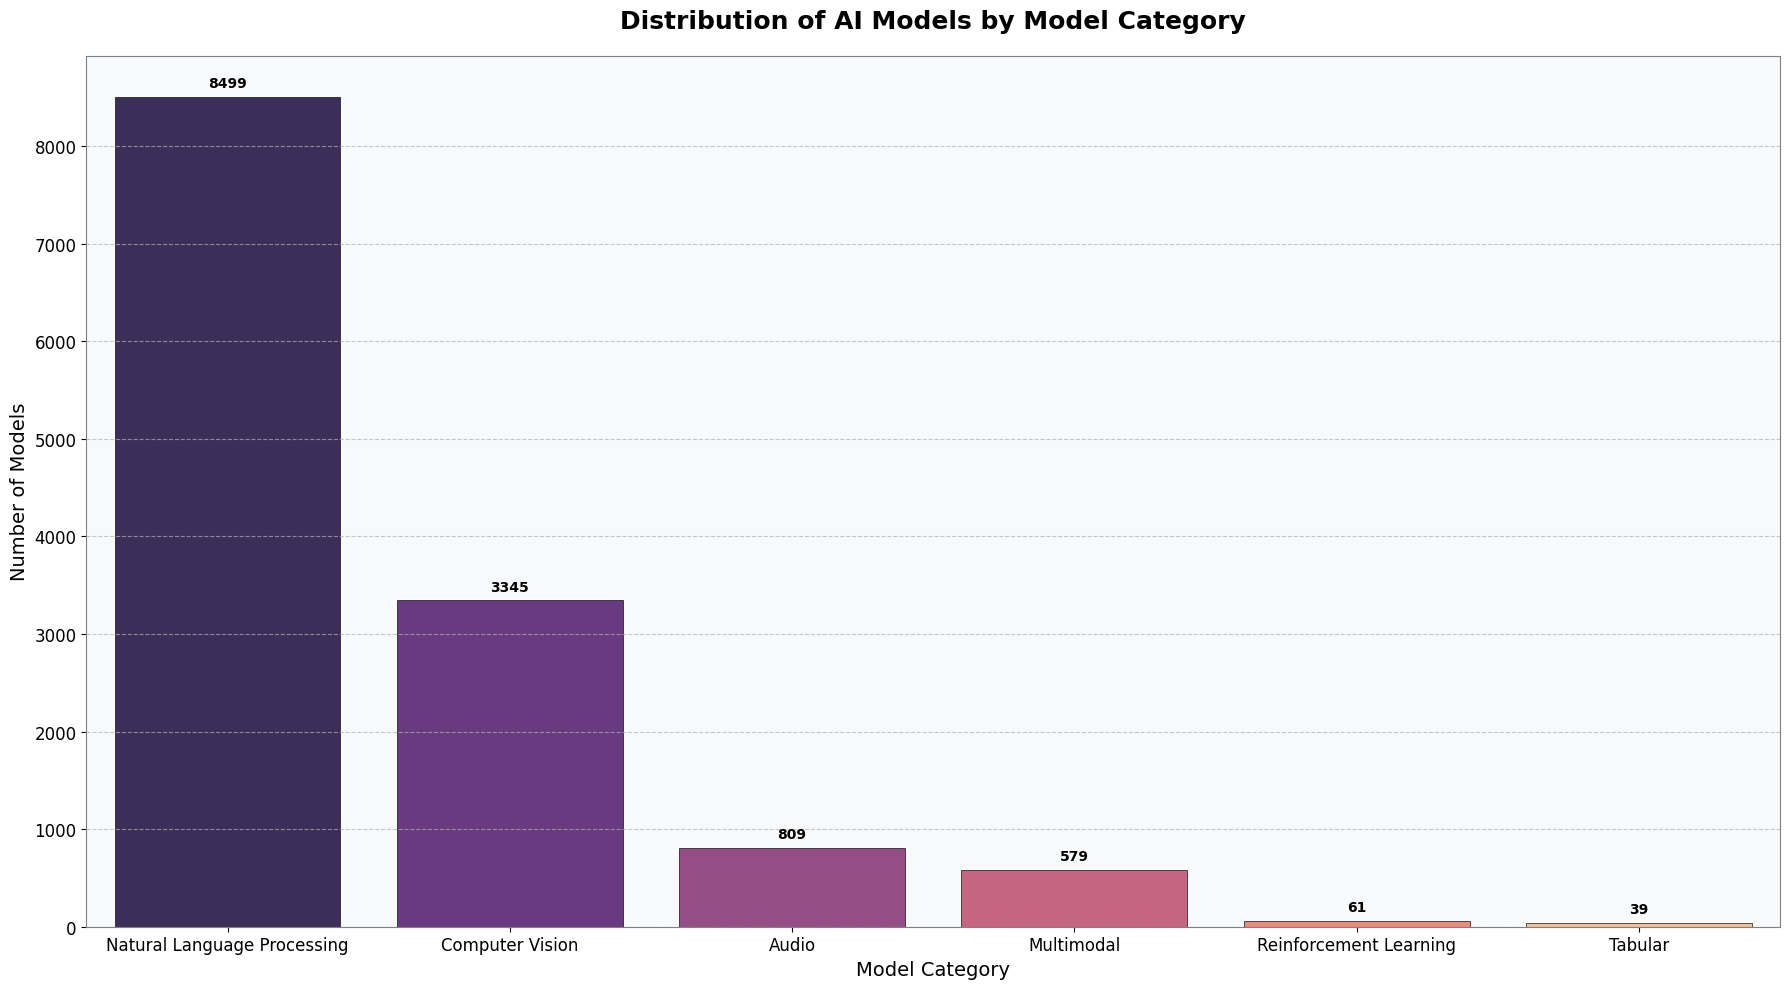

In [4]:
# Count the frequency of each model category
model_counts = data["model_category"].value_counts()

# Create a histogram plot for model categories
plt.figure(figsize=(18, 10))

# Create bar chart
ax = sns.barplot(
    x=model_counts.index,
    y=model_counts.values,
    palette="magma",
    edgecolor="black",
    linewidth=0.5,
    alpha=0.9,
)

plt.title(
    "Distribution of AI Models by Model Category",
    fontsize=18,
    pad=20,
    fontweight="bold",
)
plt.xlabel("Model Category", fontsize=14)
plt.ylabel("Number of Models", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Add value labels on top of each bar
for i, v in enumerate(model_counts.values):
    ax.text(i, v + 100, str(v), ha="center", fontsize=10, fontweight="bold")

# Enhance plot appearance
ax.set_facecolor("#f8f9fa")
plt.gcf().set_facecolor("#ffffff")

# Add a subtle border around the plot
for spine in ax.spines.values():
    spine.set_edgecolor("gray")
    spine.set_linewidth(0.8)

plt.tight_layout()
plt.show()

#### Let's analyze the distribution of AI models by task categories to understand what types of tasks are most common

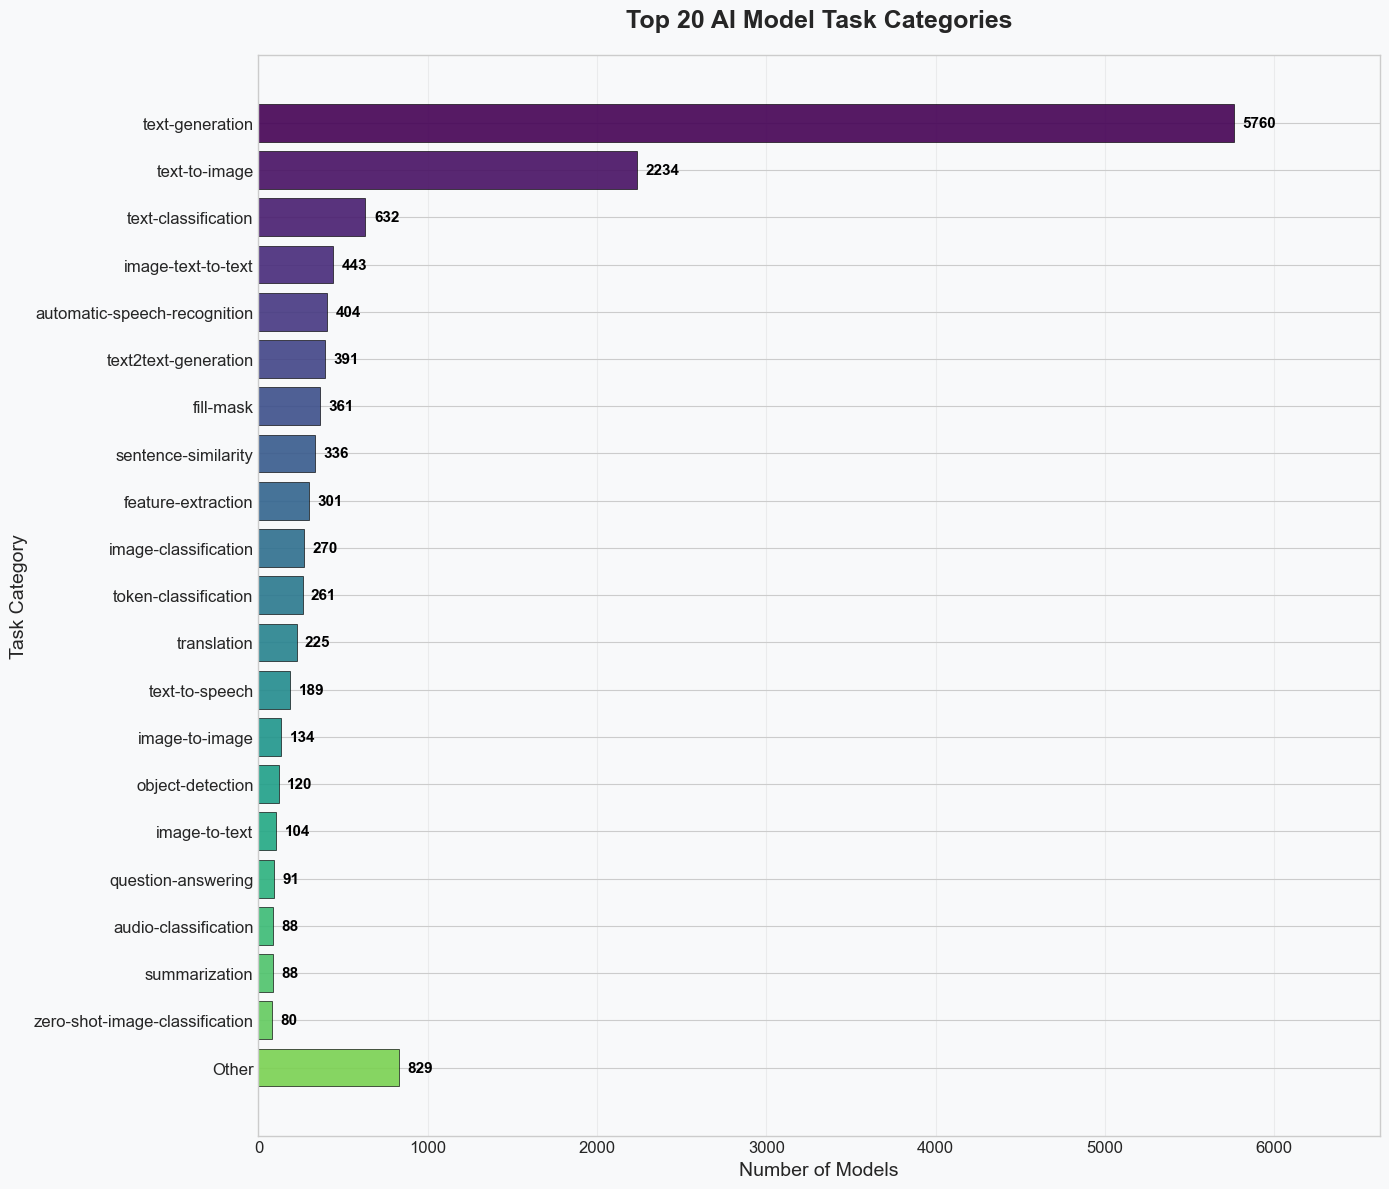

In [32]:
# Get top 20 categories and group the rest as "Other"
top_n = 20
task_counts = data["task_category"].value_counts()
top_tasks = task_counts.nlargest(top_n)
other_count = task_counts[top_n:].sum()

# Create a new series with "Other" category
plot_data = pd.concat([top_tasks, pd.Series({"Other": other_count})])

# Create horizontal bar chart
plt.figure(figsize=(14, 12))
colors = plt.cm.viridis(np.linspace(0, 0.8, len(plot_data)))

# Plot horizontal bars
bars = plt.barh(
    y=plot_data.index[::-1],  # Reverse to have largest at top
    width=plot_data.values[::-1],
    color=colors[::-1],
    edgecolor="black",
    linewidth=0.5,
    alpha=0.9,
)

plt.title("Top 20 AI Model Task Categories", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Number of Models", fontsize=14)
plt.ylabel("Task Category", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Keep only vertical grid lines
plt.grid(axis='x', linestyle='-', alpha=0.3)

# Add value labels with improved positioning
for i, bar in enumerate(bars):
    width = bar.get_width()
    value = plot_data.values[::-1][i]
    plt.text(
        width + 50,  # Offset from right edge of bar
        bar.get_y() + bar.get_height() / 2,
        f"{value}",
        ha="left",
        va="center",
        color="black",
        fontweight="bold",
        fontsize=11,
    )

# Adjust x-axis limit to make room for external labels
plt.xlim(0, max(plot_data.values) * 1.15)  # Add 15% extra space

# Set background color
plt.gcf().set_facecolor("#f8f9fa")
plt.gca().set_facecolor("#f8f9fa")

plt.tight_layout()
plt.show()

#### Let's analyze the distribution of AI models by creator to identify the most prolific publishers

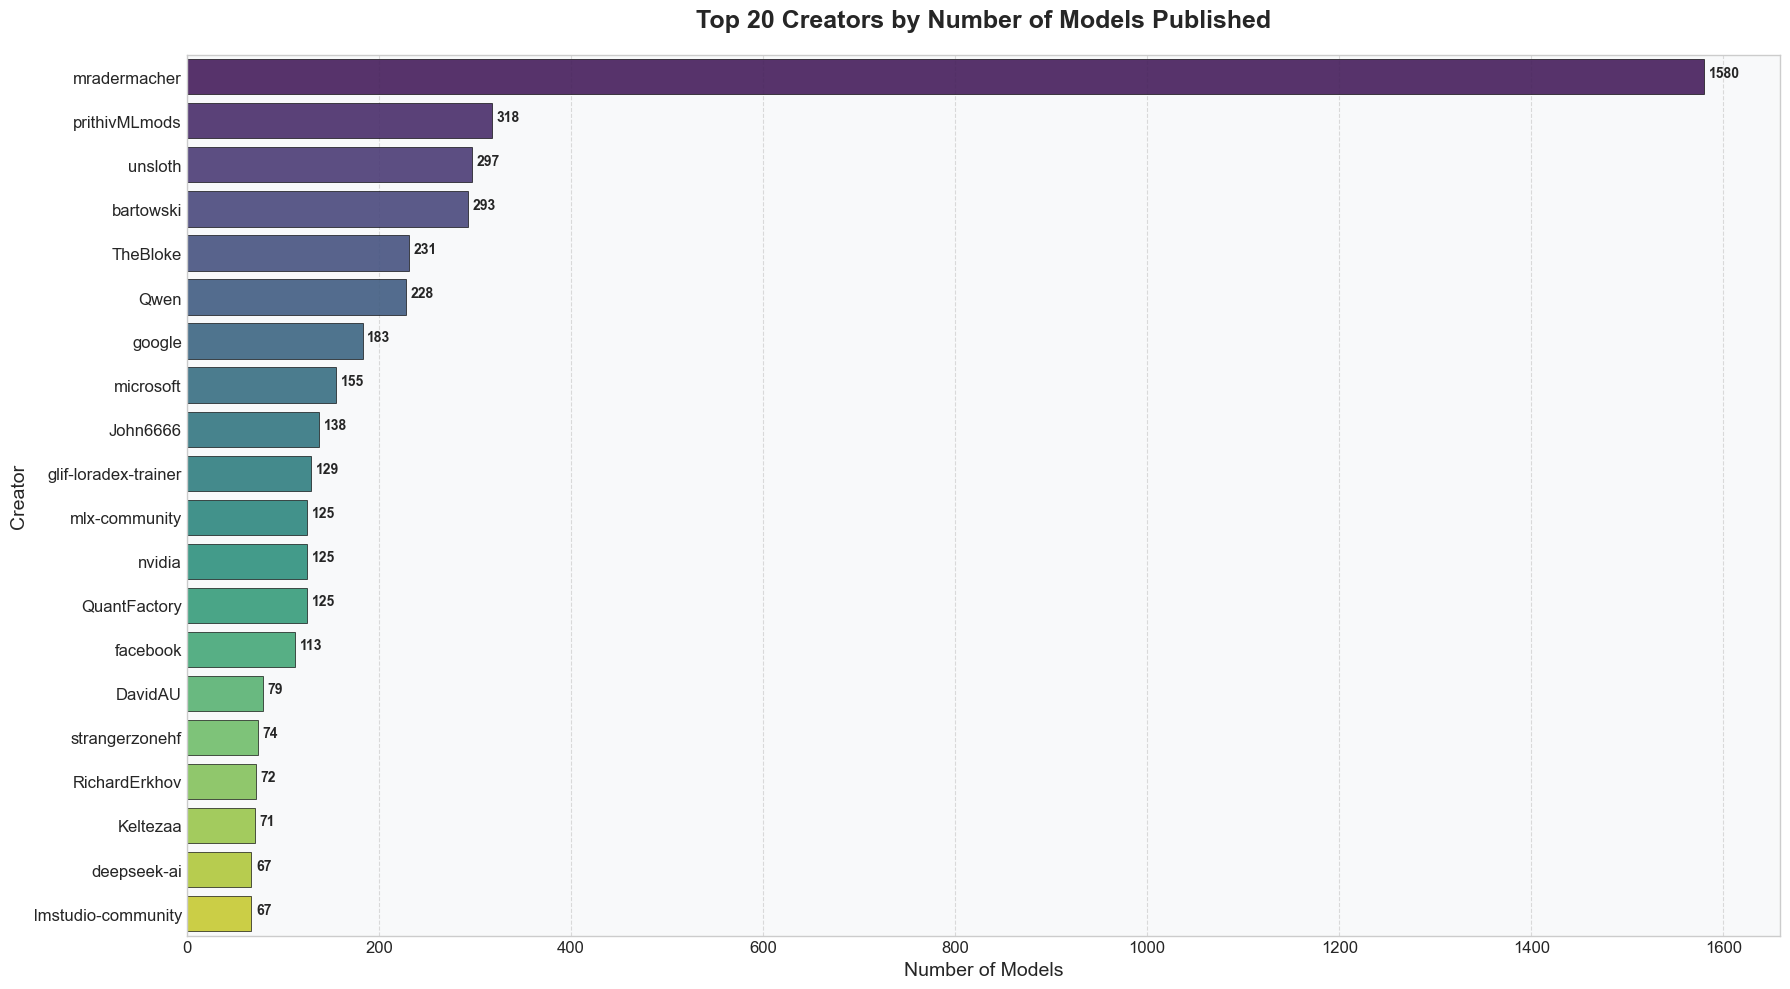

In [29]:
# Group data by creators to get the number of models published by each creator
creator_counts = data.groupby('creators').size().reset_index()
creator_counts.columns = ['creators', 'model_count']

creator_counts = creator_counts.sort_values('model_count', ascending=False)
plt.figure(figsize=(18, 10))
top_creators = creator_counts.head(20)

# Create bar chart
ax = sns.barplot(
    x='model_count', 
    y='creators', 
    data=top_creators, 
    palette='viridis',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.9
)

# Add value labels on top of each bar
for i, v in enumerate(top_creators['model_count']):
    ax.text(v + 5, i, str(v), ha='left', fontsize=10, fontweight='bold')

plt.title('Top 20 Creators by Number of Models Published', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Number of Models', fontsize=14)
plt.ylabel('Creator', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add a subtle background color
ax.set_facecolor('#f8f9fa')
plt.gcf().set_facecolor('#ffffff')

plt.tight_layout()
plt.show()


#### Let's analyze models from well-known tech companies like OpenAI, Google, Meta (Facebook), and NVIDIA

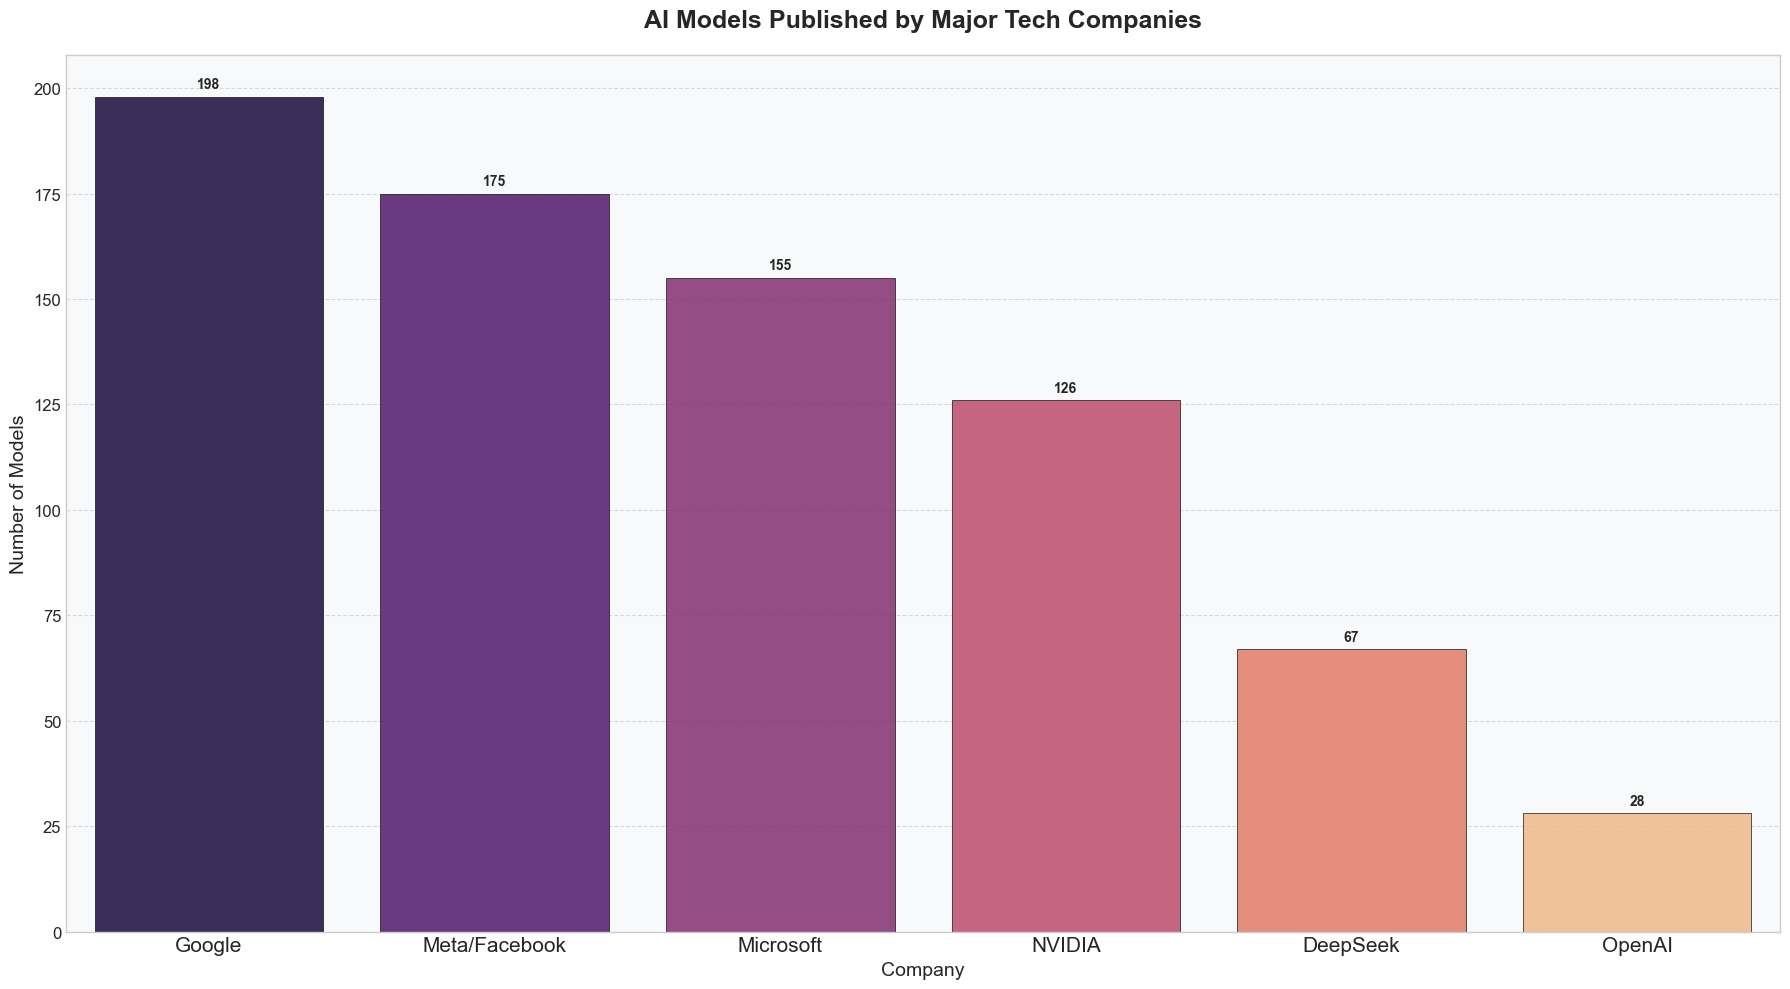

In [44]:
major_companies = [
    "openai",
    "google",
    "meta",
    "facebook",
    "nvidia",
    "microsoft",
    "deepseek",
]

# Create a mask to filter for these companies
company_mask = (
    data["creators"]
    .str.lower()
    .apply(lambda x: any(company in str(x).lower() for company in major_companies))
)
major_company_data = data[company_mask].copy()


def standardize_company(creator):
    if not creator or pd.isna(creator):
        return "Unknown"

    creator_lower = str(creator).lower().strip()

    company_mappings = {
        "openai": "OpenAI",
        "google": "Google",
        "meta": "Meta/Facebook",
        "facebook": "Meta/Facebook",
        "nvidia": "NVIDIA",
        "microsoft": "Microsoft",
        "anthropic": "Anthropic",
        "cohere": "Cohere",
        "huggingface": "Hugging Face",
        "amazon": "Amazon",
        "apple": "Apple",
        "deepseek": "DeepSeek",
    }

    for keyword, company in company_mappings.items():
        if keyword in creator_lower:
            return company

    return creator


major_company_data["company"] = major_company_data["creators"].apply(
    standardize_company
)

plt.figure(figsize=(18, 10))
company_counts = major_company_data["company"].value_counts()

# Bar chart of models by company
ax = sns.barplot(
    x=company_counts.index,
    y=company_counts.values,
    palette="magma",
    edgecolor="black",
    linewidth=0.5,
    alpha=0.9,
)

# Add value labels on top of each bar
for i, v in enumerate(company_counts.values):
    ax.text(i, v + 2, str(v), ha="center", fontsize=10, fontweight="bold")

plt.title(
    "AI Models Published by Major Tech Companies",
    fontsize=18,
    pad=20,
    fontweight="bold",
)
plt.xlabel("Company", fontsize=14)
plt.ylabel("Number of Models", fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.7)


# Add a subtle background color
ax.set_facecolor("#f8f9fa")
plt.gcf().set_facecolor("#ffffff")

plt.tight_layout()
plt.show()

#### Analyzing Model Categories by Major Tech Companies
#### This visualization shows how different companies focus on various AI model categories

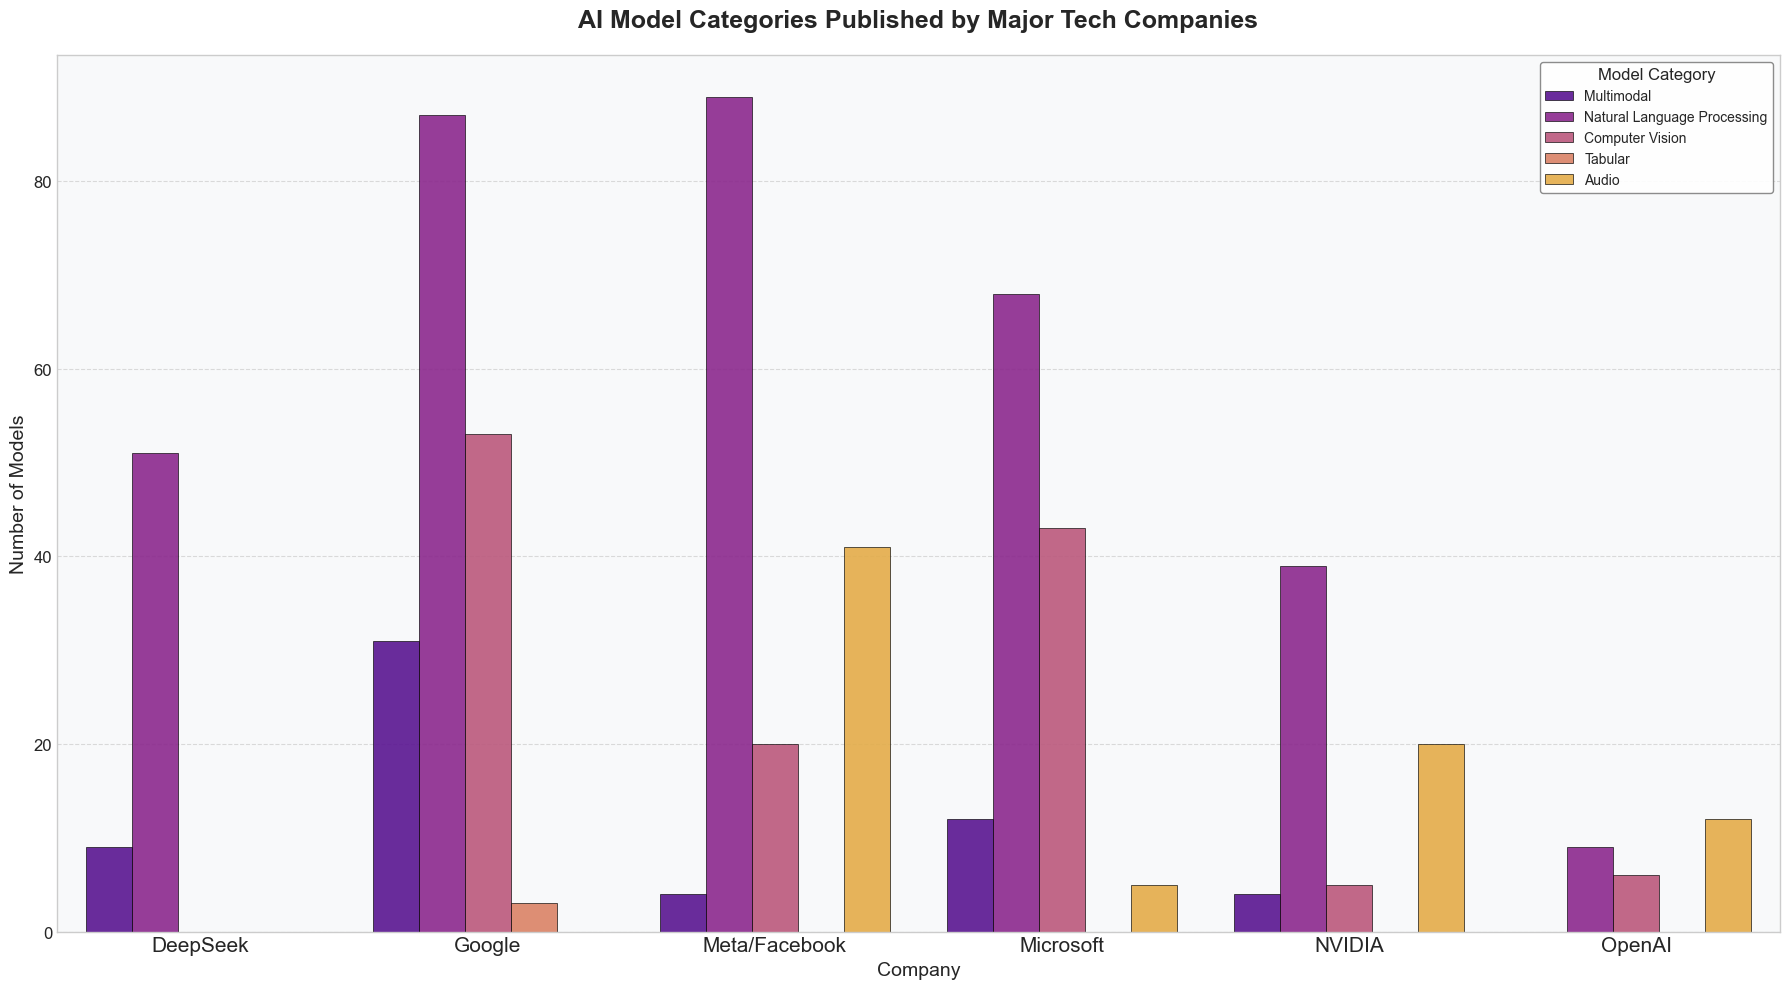

In [45]:
plt.figure(figsize=(18, 10))

company_category_counts = (
    major_company_data.groupby(["company", "model_category"])
    .size()
    .reset_index(name="count")
)
top_companies = (
    company_category_counts.groupby("company")["count"]
    .sum()
    .sort_values(ascending=False)
    .head(8)
    .index
)
filtered_data = company_category_counts[
    company_category_counts["company"].isin(top_companies)
]

# Create a grouped bar chart with a beautiful color palette
ax = sns.barplot(
    x="company",
    y="count",
    hue="model_category",
    data=filtered_data,
    palette="plasma",
    edgecolor="black",
    linewidth=0.5,
    alpha=0.9,
)

# Enhance the plot with styling
plt.title(
    "AI Model Categories Published by Major Tech Companies",
    fontsize=18,
    pad=20,
    fontweight="bold",
)
plt.xlabel("Company", fontsize=14)
plt.ylabel("Number of Models", fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

# Add a grid for better readability
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Improve the legend and place it inside the plot
plt.legend(
    title="Model Category",
    title_fontsize=12,
    fontsize=10,
    loc="upper right",
    frameon=True,
    framealpha=0.9,
    edgecolor="gray",
)

# Add a subtle background color
ax.set_facecolor("#f8f9fa")
plt.gcf().set_facecolor("#ffffff")

plt.tight_layout()
plt.show()

#### Let's analyze the top models from major tech companies by downloads

<Figure size 1800x1400 with 0 Axes>

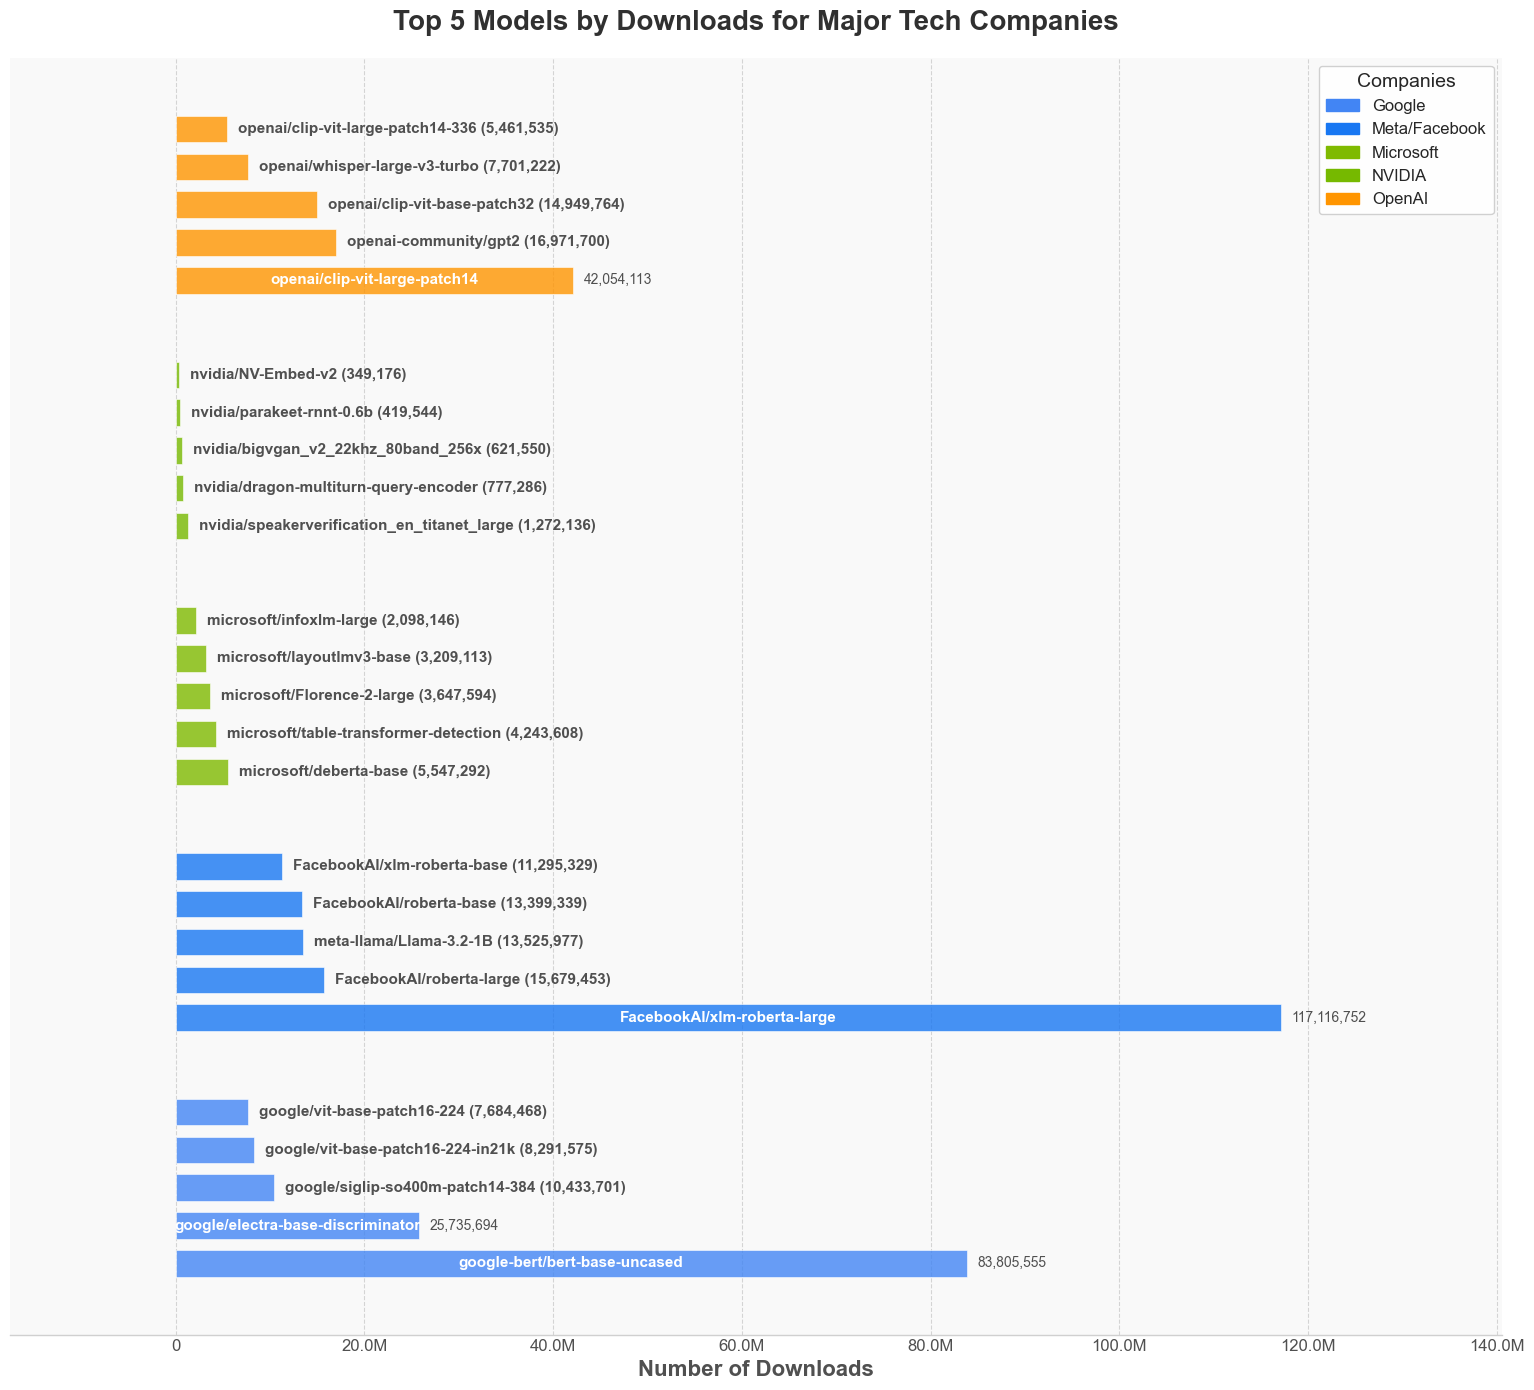

In [47]:
top_companies = ["Google", "Meta/Facebook", "Microsoft", "NVIDIA", "OpenAI"]
top_company_data = major_company_data[major_company_data["company"].isin(top_companies)]

# Get the top 5 models by downloads for each company
top_models_by_company = {}
for company in top_companies:
    company_models = top_company_data[top_company_data["company"] == company]
    # Sort by downloads and take top 5
    top_models = company_models.sort_values("downloads", ascending=False).head(5)
    top_models_by_company[company] = top_models

# Create a horizontal bar chart with improved title and label positioning
plt.figure(figsize=(18, 14))
plt.style.use('seaborn-v0_8-whitegrid')

# Create a dictionary to store all models and their downloads
all_models_data = []

for company in top_companies:
    if company in top_models_by_company and not top_models_by_company[company].empty:
        models = top_models_by_company[company]
        for j in range(min(len(models), 5)):
            all_models_data.append({
                'company': company,
                'model_name': models.iloc[j]["model_name"],
                'downloads': models.iloc[j]["downloads"]
            })

# Convert to DataFrame for easier plotting
df_plot = pd.DataFrame(all_models_data)

# Sort by company and then by downloads within each company
df_plot = df_plot.sort_values(['company', 'downloads'], ascending=[True, False])

# Define colors
company_colors = {
    "OpenAI": "#FF9500",
    "Google": "#4285F4",
    "Meta/Facebook": "#1877F2",
    "Microsoft": "#7FBA00",
    "NVIDIA": "#76B900"
}

# Create the plot
fig, ax = plt.subplots(figsize=(18, 14))

# Get unique companies for spacing
companies = df_plot['company'].unique()

# Plot horizontal bars
y_positions = []
y_ticks = []
current_position = 0

for i, company in enumerate(companies):
    company_data = df_plot[df_plot['company'] == company]
    
    for j, (_, row) in enumerate(company_data.iterrows()):
        bar = ax.barh(current_position, row['downloads'], 
                     color=company_colors[row['company']], alpha=0.8,
                     height=0.7, edgecolor='white', linewidth=0.5)
        
        formatted_downloads = f"{row['downloads']:,}"
        # Add model name inside or next to the bar with better positioning
        if row['downloads'] > max(df_plot['downloads']) * 0.15:
            # For long bars, place text inside
            text_position = row['downloads'] * 0.5
            text_color = 'white'
            ax.text(text_position, current_position, row['model_name'], 
                    va='center', ha='center',
                    fontsize=11, fontweight='bold', color=text_color)
            ax.text(row['downloads'] + max(df_plot['downloads']) * 0.01, 
                        current_position,
                        formatted_downloads, va='center', ha='left', 
                        fontsize=10, color='#505050')
        else:
            # For short bars, place text to the right of the bar
            text_position = row['downloads'] + max(df_plot['downloads']) * 0.01
            text_color = '#505050'
            ax.text(text_position, current_position, row['model_name'] + f" ({formatted_downloads})", 
                    va='center', ha='left',
                    fontsize=11, fontweight='bold', color=text_color)
        

    
        y_positions.append(current_position)
        current_position += 1
    
    # Add spacing between companies
    current_position += 1.5

# Extend the left margin to make room for company labels
plt.subplots_adjust(left=0.15)

# Customize the plot
ax.set_yticks([])  # Remove y-ticks since we have custom labels
ax.set_title("Top 5 Models by Downloads for Major Tech Companies", 
             fontsize=20, pad=20, fontweight="bold", color='#303030')
ax.set_xlabel("Number of Downloads", fontsize=16, fontweight='bold', color='#505050')

# Format x-axis with millions
def millions_formatter(x, pos):
    if x >= 1000000:
        return f"{x/1000000:.1f}M"
    elif x >= 1000:
        return f"{x/1000:.0f}K"
    else:
        return f"{int(x)}"

ax.xaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))
ax.tick_params(axis="x", labelsize=12, colors='#505050')

# Add a legend with improved positioning
handles = [plt.Rectangle((0, 0), 1, 1, color=company_colors[company]) for company in companies]
ax.legend(handles, companies, loc="upper right", title="Companies", 
          title_fontsize=14, fontsize=12, frameon=True, framealpha=0.9)

# Clean up the plot
ax.grid(axis="x", linestyle="--", alpha=0.3, color='gray')
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#d0d0d0')
ax.set_facecolor("#f9f9f9")
fig.set_facecolor("#ffffff")

# Set x-axis limits to include space for company labels on the left
ax.set_xlim(-max(df_plot['downloads'])*0.15, max(df_plot['downloads'])*1.2)

plt.tight_layout()
# Adjust the layout to make room for company labels
plt.subplots_adjust(left=0.15)
plt.show()

#### Now let's analyze how the size of model was growing during last 2 years

In [49]:
# Convert publishing_date to datetime
data["publishing_date"] = pd.to_datetime(data["publishing_date"], errors="coerce")

# Drop rows with missing publishing_date or likes
df = data.dropna(subset=["publishing_date", "likes", "model_size"])

# Filter for the recent data
recent_data = df["publishing_date"].max() - pd.DateOffset(months=24)
df = df[df["publishing_date"] >= recent_data]

# Extract top-100 popular models
df = df.nlargest(100, "likes")

# Apply cube root scaling to model_size to better visualize large differences
df["scaled_model_size"] = np.cbrt(df["model_size"])
df["scaled_likes"] = np.sqrt(df["likes"])

# Create an improved bubble chart
fig = px.scatter(
    df,
    x="publishing_date",
    y="scaled_likes",
    size="scaled_model_size",
    color="downloads",
    hover_data=["model_name", "likes", "model_size", "downloads"],
    title="AI Model Size and Popularity Over Time",
    labels={
        "publishing_date": "Publishing Date",
        "scaled_likes": "Number of Likes (Root Scaled)",
        "downloads": "Downloads",
    },
    size_max=60,
    color_continuous_scale="Viridis",
)

# Improve layout and styling
fig.update_layout(
    height=800,
    width=1200,
    plot_bgcolor="rgba(240, 240, 250, 0.8)",
    paper_bgcolor="white",
    font=dict(family="Arial", size=14),
    title=dict(font=dict(size=24), x=0.5),
    legend=dict(title="Downloads", orientation="v", yanchor="top", y=1, xanchor="right", x=1.02),
    margin=dict(l=80, r=80, t=100, b=80),
)

# Improve axes
fig.update_xaxes(
    title_font=dict(size=18),
    tickfont=dict(size=14),
    gridcolor="lightgray",
    showgrid=True,
)

fig.update_yaxes(
    title_font=dict(size=18),
    tickfont=dict(size=14),
    gridcolor="lightgray",
    showgrid=True,
)

# Add custom hover template
fig.update_traces(
    hovertemplate="<b>%{customdata[0]}</b><br>" +
    "Date: %{x|%b %d, %Y}<br>" +
    "Likes: %{customdata[1]:,}<br>" +
    "Model Size: %{customdata[2]:,} parameters<br>" +
    "Downloads: %{customdata[3]:,}<extra></extra>"
)

# Show interactive plot
fig.show()

#### Let's analyze the distribution of AI models by type and task category over time

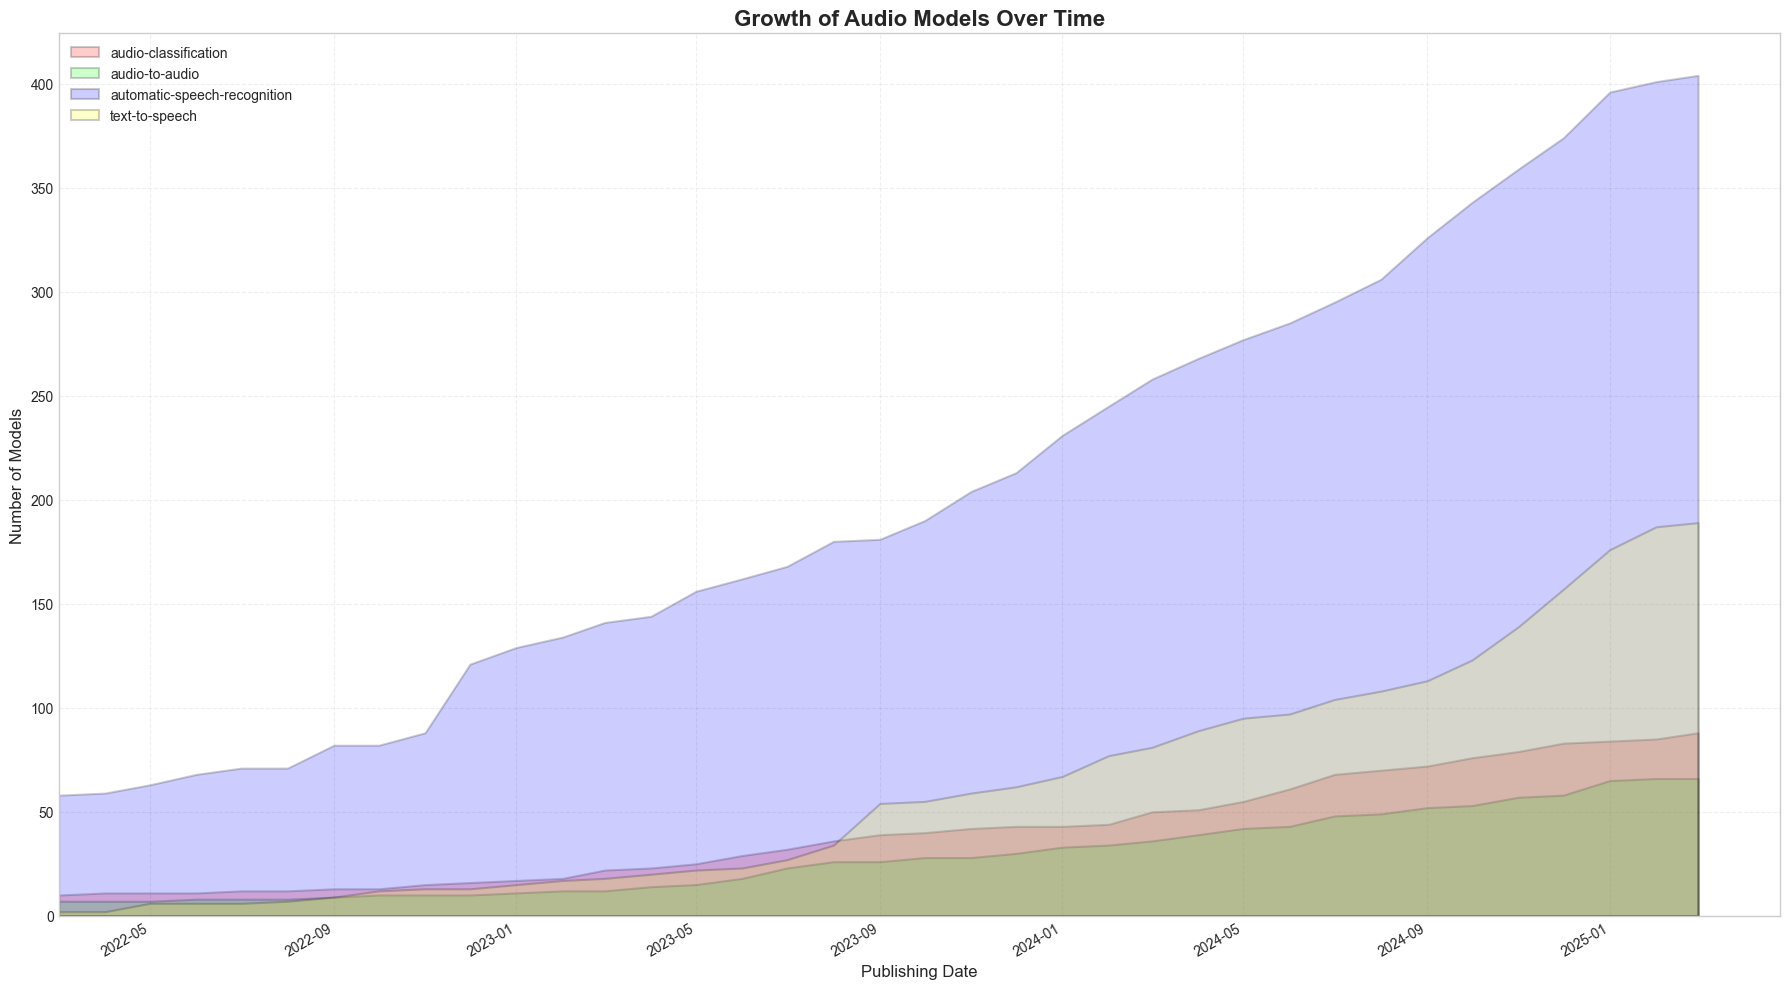

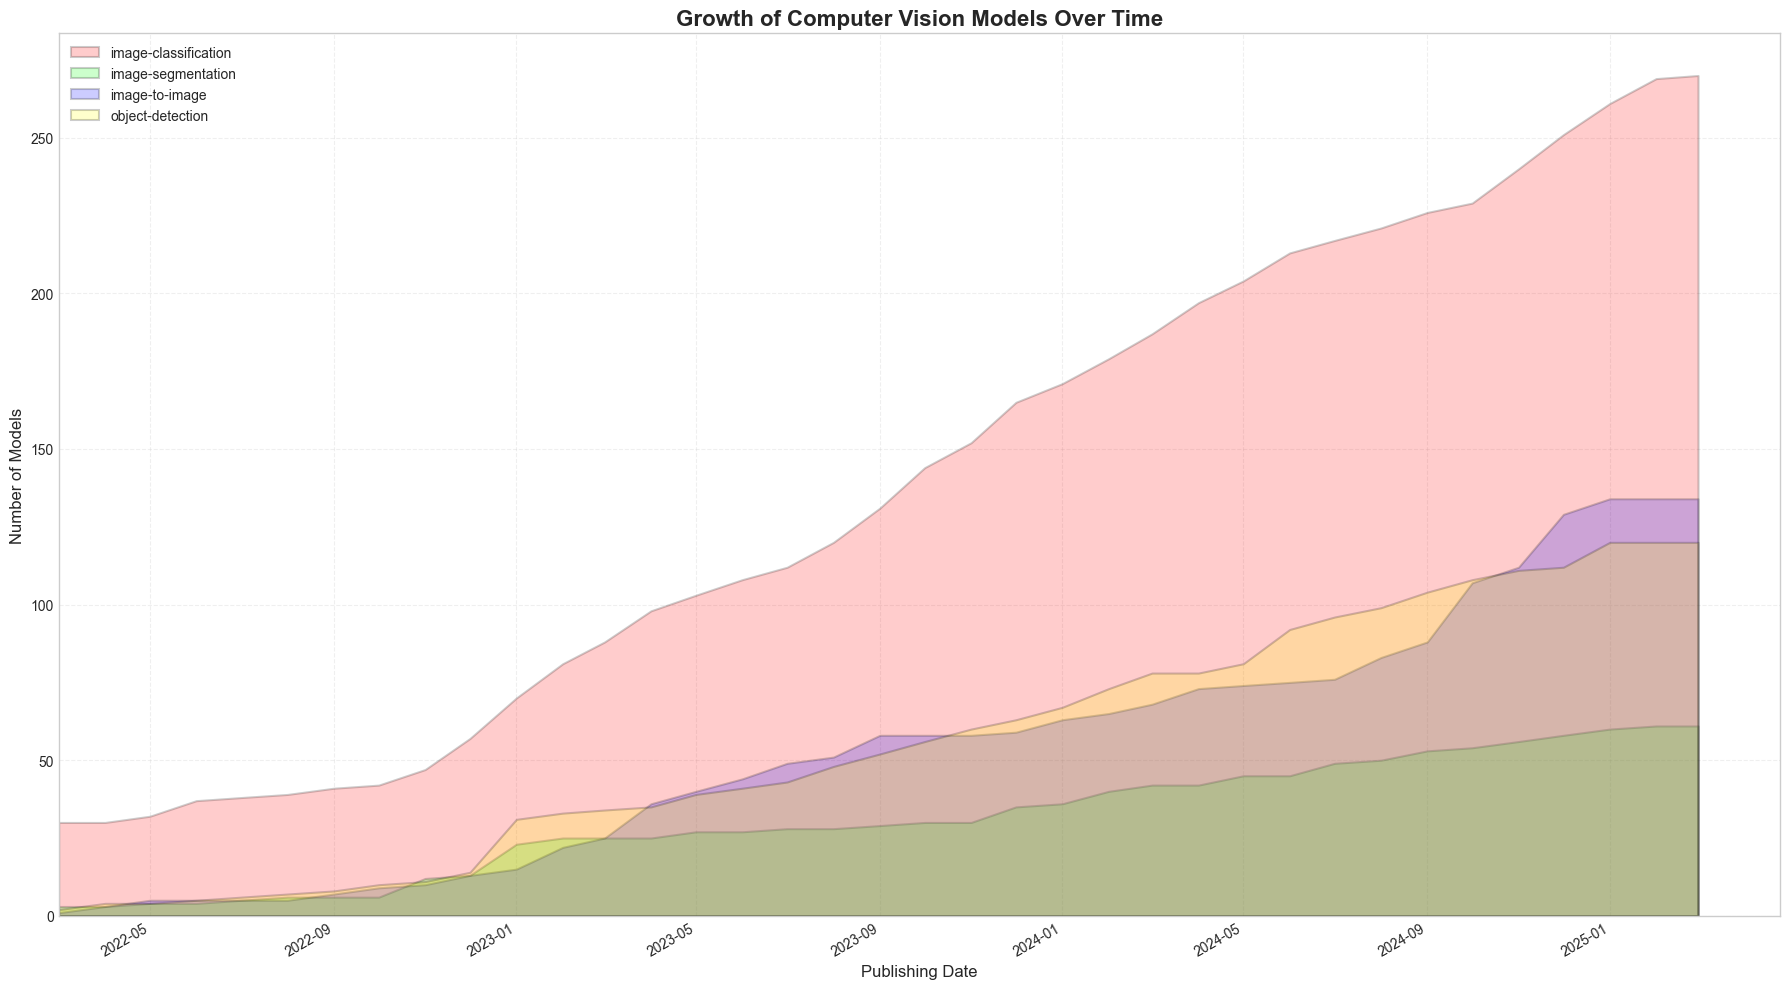

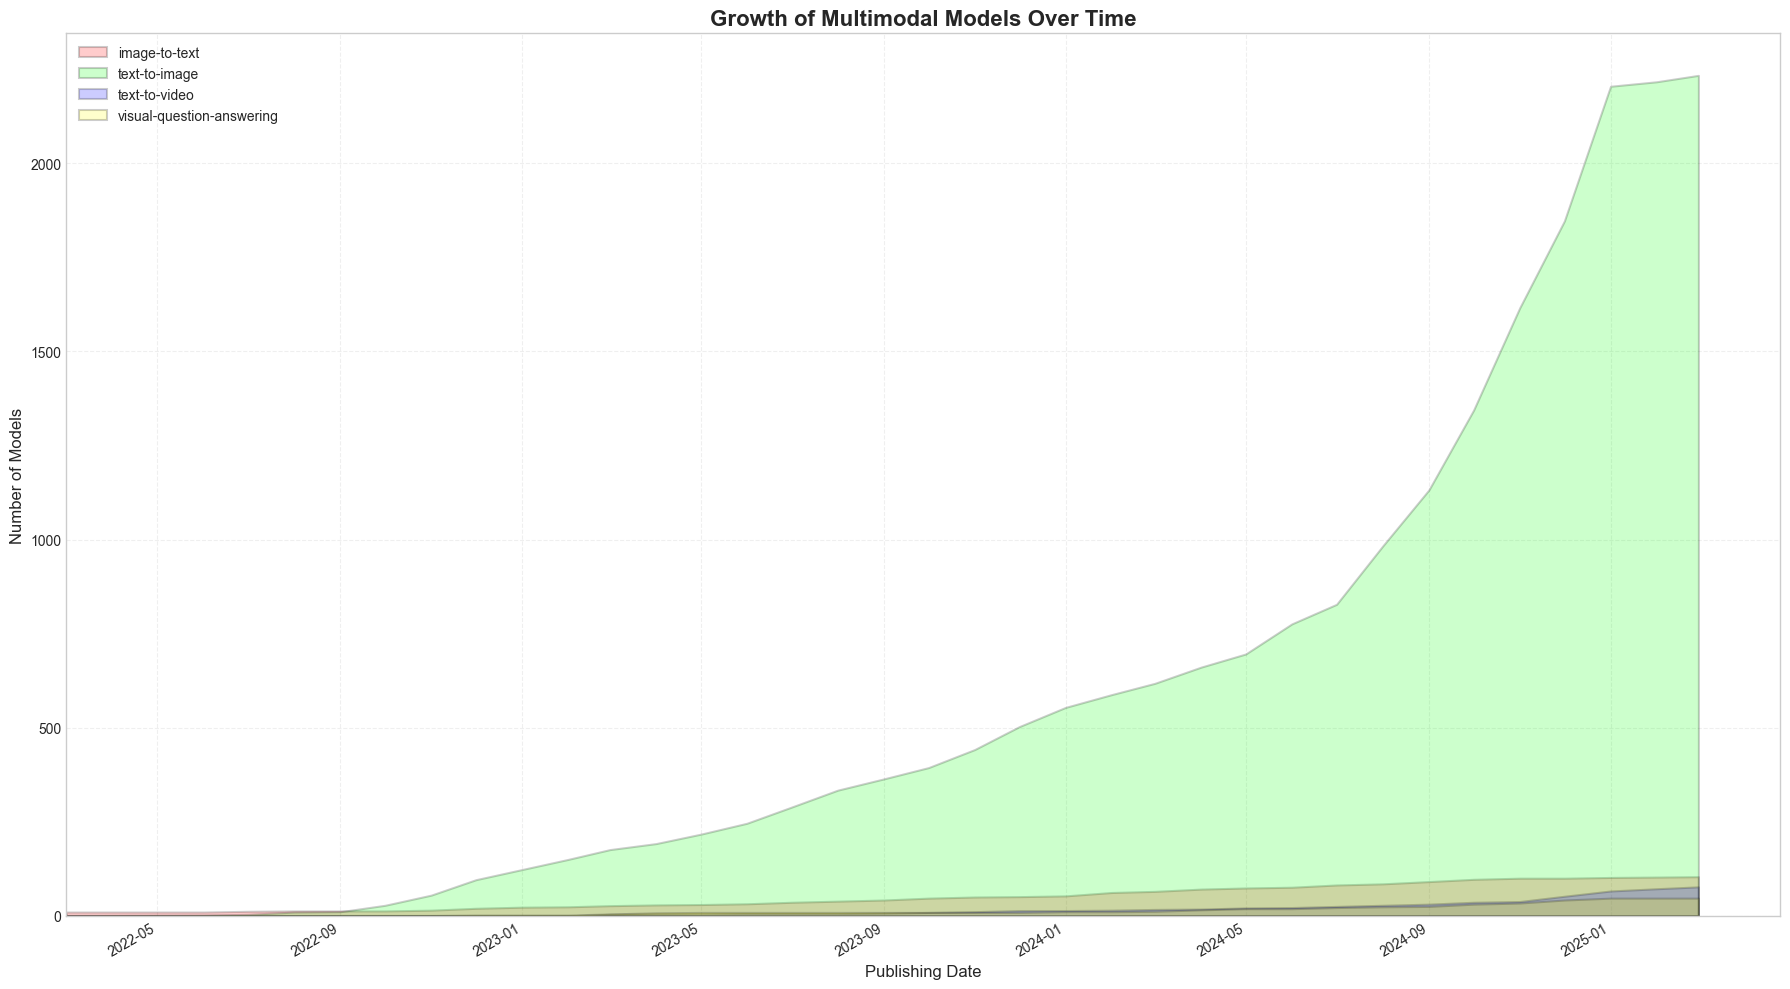

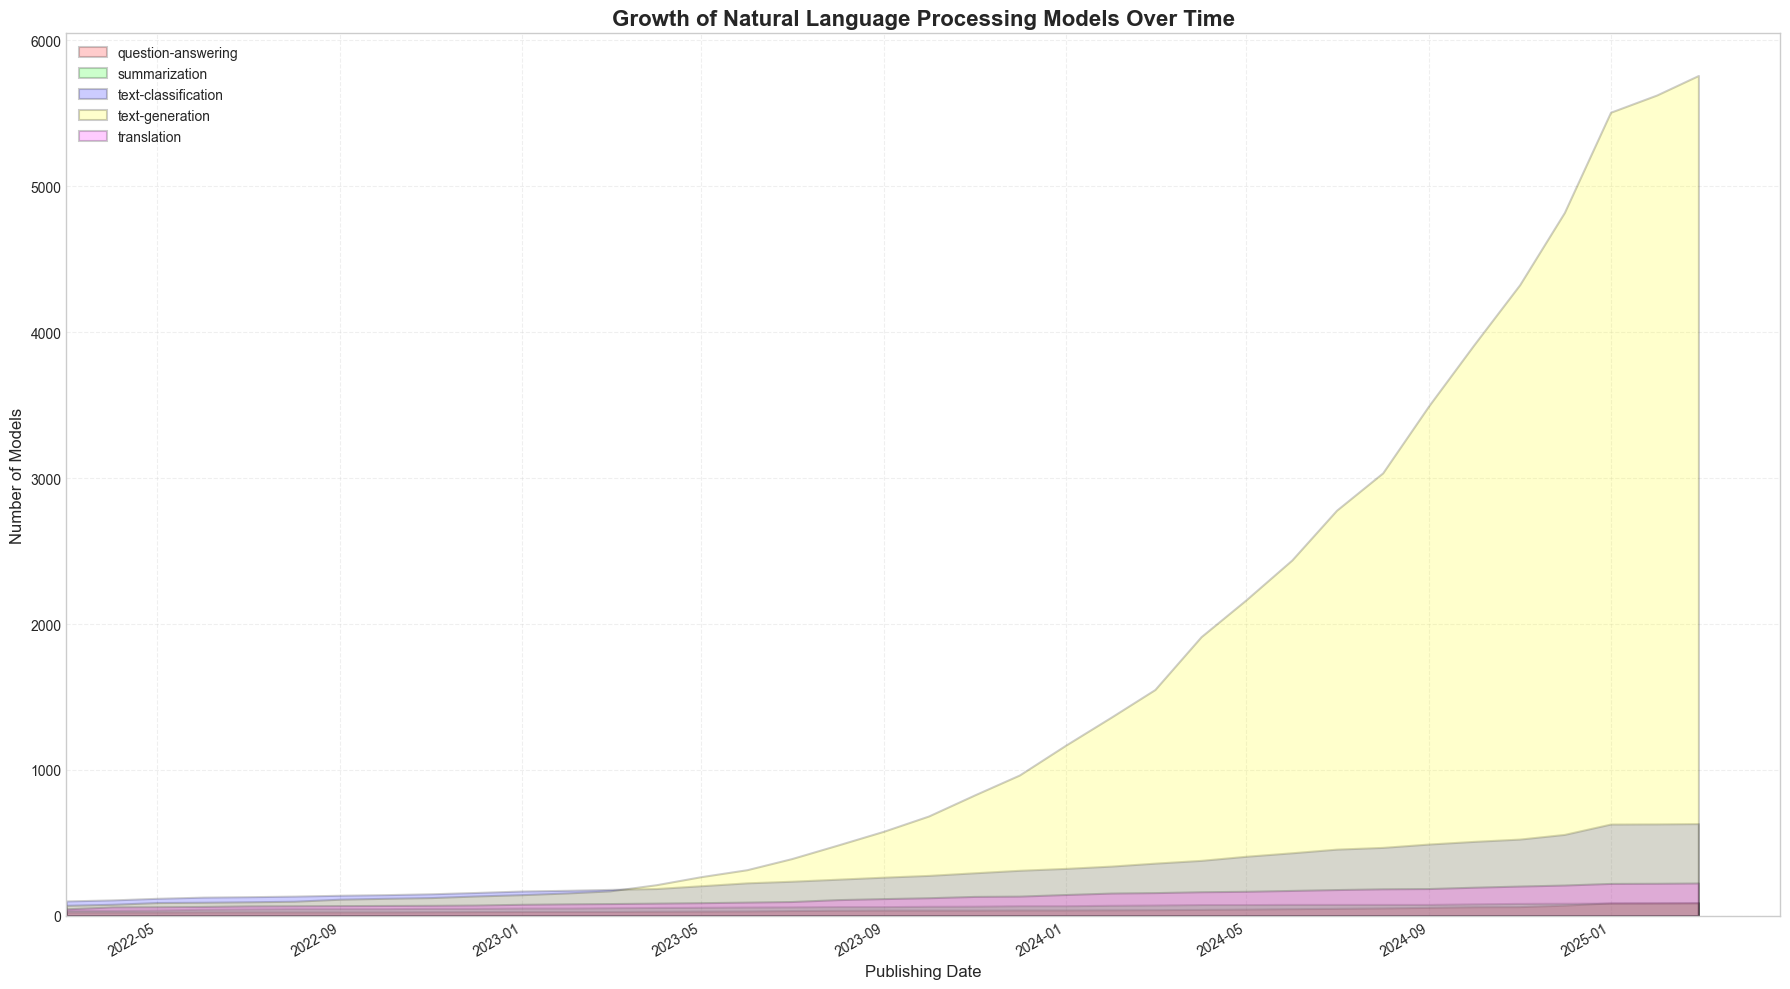

In [50]:
data["publishing_date"] = pd.to_datetime(data["publishing_date"])
chart_data = data.copy()
chart_data["month_year"] = chart_data["publishing_date"].dt.to_period("M")

# Create a mapping of task categories to model types
model_type_mapping = {
    "text-generation": "Natural Language Processing",
    "text-classification": "Natural Language Processing",
    "question-answering": "Natural Language Processing",
    "summarization": "Natural Language Processing",
    "translation": "Natural Language Processing",
    "conversational": "Natural Language Processing",
    "image-classification": "Computer Vision",
    "object-detection": "Computer Vision",
    "image-segmentation": "Computer Vision",
    "image-to-image": "Computer Vision",
    "text-to-image": "Multimodal",
    "text-to-video": "Multimodal",
    "image-to-text": "Multimodal",
    "visual-question-answering": "Multimodal",
    "automatic-speech-recognition": "Audio",
    "text-to-speech": "Audio",
    "audio-classification": "Audio",
    "audio-to-audio": "Audio",
}

# Apply the mapping to create a new column for model type
chart_data["model_type"] = chart_data["task_category"].map(model_type_mapping)

# Filter out rows where model_type is None or NaN
chart_data = chart_data.dropna(subset=["model_type"])

# Group by month_year, model_type, and task_category and count the number of models
grouped_data = (
    chart_data.groupby(["month_year", "model_type", "task_category"])
    .size()
    .reset_index(name="count")
)

# Sort by month_year to ensure chronological order
grouped_data = grouped_data.sort_values("month_year")

# Convert month_year period to datetime for plotting
grouped_data["date"] = grouped_data["month_year"].dt.to_timestamp()

# Get all unique model types
model_types = sorted(chart_data["model_type"].unique())

highly_contrasting_colors = [
    "#FF0000",
    "#00FF00",
    "#0000FF",
    "#FFFF00",
    "#FF00FF",
    "#00FFFF",
    "#FF8000",
    "#8000FF",
    "#0080FF",
    "#FF0080",
    "#80FF00",
    "#00FF80",
    "#000000",
    "#808080",
    "#804000",
    "#408000",
    "#004080",
    "#800040",
    "#408080",
    "#804080",
]

# Plot growth of models over time by task categories
for model_type in model_types:
    # Filter data for this model type
    model_data = grouped_data[grouped_data["model_type"] == model_type]

    if len(model_data) == 0:
        continue

    pivot_data = model_data.pivot_table(
        index="date", columns="task_category", values="count", fill_value=0
    ).cumsum()
    plt.figure(figsize=(18, 10))

    # Get all task categories for this model type
    task_categories = pivot_data.columns.tolist()

    # Plot each task category with highly contrasting colors
    handles = []
    for i, task in enumerate(task_categories):
        color_idx = i % len(highly_contrasting_colors)
        area = plt.fill_between(
            pivot_data.index,
            pivot_data[task],
            label=task,
            alpha=0.2,
            color=highly_contrasting_colors[color_idx],
            edgecolor="black",
            linewidth=1.5,  # Increased linewidth for bolder edges
        )
        handles.append(area)

    plt.title(
        f"Growth of {model_type} Models Over Time", fontsize=16, fontweight="bold"
    )
    plt.xlabel("Publishing Date", fontsize=12)
    plt.ylabel("Number of Models", fontsize=12)
    plt.gcf().autofmt_xdate()
    plt.grid(True, linestyle="--", alpha=0.3)

    # Add legend with better formatting
    plt.legend(
        handles=handles,
        loc="upper left",
        fontsize=10,
        framealpha=0.9,
        edgecolor="black",
        fancybox=False,
    )
    plt.ylim(bottom=0)

    if len(pivot_data.index) > 0:
        plt.xlim(left=pivot_data.index.min())

    plt.tight_layout()
    plt.show()